# Graph Machine Learning Introduction

by Alejandro Correa Bahnsen, Jaime D. Acevedo-Viloria & Luisa Roa

version 1.2, October 2022

In this notebook we will be doing a brief introduction to graph machine learning. The agenda is as follows:


1. Different types of graphs - Introduction to NetworkX
2. Creating Graph Based Features and enhancing ML models
3. Creating a Graph from own data using NetworkX
4. Transductive Learning vs. Inductive Learning
5. Graph Neural Networks - Introduction to DGL

Through these basics you will be able to leverage graphs for the enhacement of Machine Learning models, or be able to learn the basics of how to build Neural Networks specially crafted for Graphs. We hope you like it!

In [1]:
#Install libraries
!pip install dgl==0.6.1
!pip install torch==1.9.0

## Types of Graphs - An Introduction to NetworkX

NetworkX according to it's creators is: NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. 

![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/networkx_description.png)

https://networkx.org/

We will be using the latest stable 2.8.7 version of the Package as referenced on the requirements .txt provided in the repo.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

Let's start by describing different properties graphs can have and what those mean for the graph in subject. We will use NetworkX visual examples for every one of them and we will also describe real world applications where you may find such type of graph.

We will be using different NetworkX to innitialize graphs, this is just to highlight the many different ways we can do this. Make sure to check the documentation for more info in this: https://networkx.org/documentation/stable/reference/generators.html

### Directed & Undirected Graphs

This property refers as to whether the edges connecting the graphs have an inherent direction in it.

In undirected the graphs, edges indicate a two-way relationship, and as such they can be traversed from either node to other connected. In directed graphs, edges indicate a one-way direction. Meaning that they can only be traversed in an specific direction of the edge.

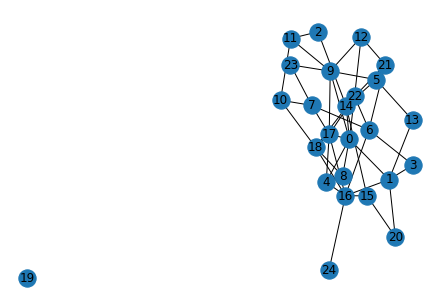

In [2]:
#Initilize a random graph
g_gaussian = nx.gaussian_random_partition_graph(25, 4, 5, 0.25, 0.1, directed=False)

#Draw the graph structure
nx.draw(g_gaussian, with_labels=True)

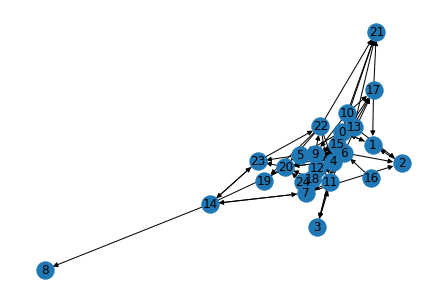

In [3]:
#Initialize a random directed graph
g_gaussian_dir = nx.gaussian_random_partition_graph(25, 4, 5, 0.25, 0.1, directed=True, seed=23)

#Draw the graph structure
nx.draw(g_gaussian_dir, with_labels=True)

This is normally described by the use of an arrow pointing the direction of the edge, if there is no arrow then we can assume the graph is undirected. We can see this in the above networkX examples, where we create both a undirected and directed Random Gaussian Graph setting the directed parameter to True and False respectively.

This is a very important characteristic in real life application. When creating graphs to describe real-life processes we might have an Instagram like Social Network, where an user can follow another user but it doesn't have to be the other way around. This would be a directed graph.

We may also have a Facebook like Social Network, where when a friend request is sent and accepted both users are instantly connected to each other. This could be described by an undirected graph.

We can also see this, when extracting the edges of the graph with the edges() method, take a look:

In [4]:
g_gaussian.edges()

EdgeView([(0, 1), (0, 4), (0, 8), (0, 9), (0, 14), (0, 17), (0, 22), (1, 3), (1, 13), (1, 16), (1, 20), (2, 11), (2, 14), (3, 6), (4, 8), (4, 16), (4, 17), (5, 9), (5, 13), (5, 14), (5, 21), (6, 7), (6, 16), (6, 21), (6, 22), (7, 10), (7, 17), (7, 23), (8, 18), (9, 11), (9, 12), (9, 17), (9, 23), (10, 11), (10, 18), (12, 21), (12, 22), (14, 15), (15, 16), (15, 20), (16, 17), (16, 18), (16, 24), (17, 18), (17, 22), (18, 22), (21, 22)])

In [5]:
g_gaussian_dir.edges()

OutEdgeView([(0, 1), (0, 3), (0, 5), (0, 21), (1, 0), (2, 1), (3, 11), (4, 3), (4, 17), (4, 20), (5, 4), (5, 6), (5, 23), (6, 2), (6, 7), (6, 9), (6, 17), (6, 20), (7, 2), (7, 14), (9, 6), (9, 22), (10, 9), (10, 11), (10, 17), (10, 21), (11, 6), (11, 7), (11, 9), (12, 0), (12, 7), (13, 2), (13, 7), (13, 12), (13, 21), (14, 7), (14, 8), (14, 15), (14, 23), (16, 6), (15, 9), (15, 17), (15, 24), (17, 1), (17, 21), (18, 11), (18, 15), (18, 20), (18, 24), (19, 5), (20, 4), (20, 23), (22, 4), (22, 11), (22, 19), (22, 20), (22, 21), (24, 15), (24, 18), (24, 20), (23, 14), (23, 22)])

This accesses the EdgeView for the undirected graphs where all edges are given as undirected. While, on the directed graph we can see that it defaults to the OutEdges of the graph, meaning that those tuples represent just a one-way path from one node to the other.

### Weighted and Unweighted

Another property that graphs can have is that they have edges with different weights, this means that in the relationship between two nodes there is a numerical value that indicates the magnitude of how strong or important the relationship is. In this way, weighted graphs are those that contain a weight on each edge while a unweighted graph does not.

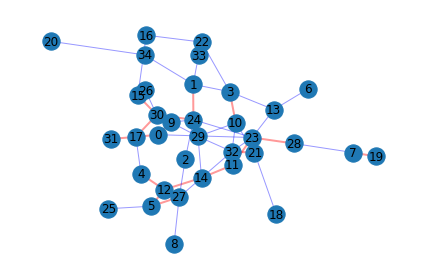

In [6]:
import random
import matplotlib.pyplot as plt

#Inicialize a random graph
G=nx.gnm_random_graph(35, 50, seed=12)

#Assign a random weights
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.random()

#Define type of relationship
family = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.6]
friend = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.6]

#Plot
pos = nx.spring_layout(G, seed=124)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(
    G, pos, edgelist=family, width=2, edge_color='r', alpha = 0.4
)
nx.draw_networkx_edges(
    G, pos, edgelist=friend, width=1, edge_color='b', alpha = 0.4
)

nx.draw_networkx_labels(G, pos)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

We create a graph with 35 nodes and 50 random edges with the gnm_random_graph function, then we assign the property 'weights' to the edges with a random probability. Lets now assume that it is a social network, where each node is a person who has different connections with friends or family, if the weight is greater than 0.6 then there is a closer connection so they are family, but if the weight is less than 0.6 then the relationship is less strong and they are friends.

Although this is a simple example, in many real-world applications it is an important characteristic to consider since not all relatinoships are equal. Furthermore, different graphs algorithms are affected, for example in the shortest path algorith what used to be the shortest path can also be the most expensive given the weights in the edges.

### Sparse & Dense Graphs

This is an interesting distinction, the density of the graph refers to both the number of nodes and how connected are them. In mathematics, a dense graph is a graph in which the number of edges is close to the maximal number of edges. The maximal number of edges being all the pair combination of nodes in an undirected graph, and all the pair permutation of nodes in an undirected graph.

In other words, the more close to fully connected the graph is - fully connected meaning that every node is connected to each other-, the more dense we can say the graph is. If the graph is a bunch of disjunct islands of nodes, we can safely say that is a sparse graph. Let's see some networkX examples:

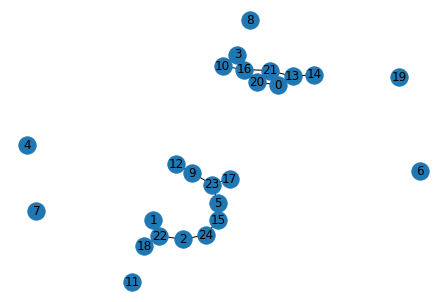

In [7]:
#Set number of nodes n
n = 25

#Initialize the sparse graph
g_sparse = nx.erdos_renyi_graph(n, 0.08,seed=23)

#Draw the graph structure
nx.draw(g_sparse, with_labels=True)

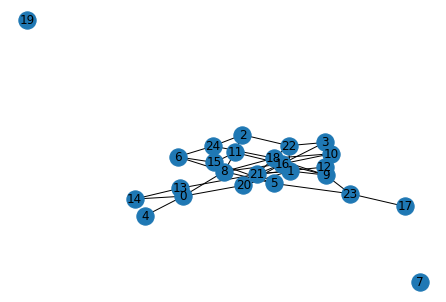

In [8]:
#Initialize the dense graph
g_dense = nx.erdos_renyi_graph(n, 0.15,seed=23)

#Draw the graph structure
nx.draw(g_dense, with_labels=True)

We create the graphs using the generator method erdos_renyi_graph, this is a commonly used model to generate random graphs from two parameters: The number of nodes n, and the probability to create an edge for every pair of nodes p.

Therefore, for the sparse graph we set up a small probability of 0.08, and for the dense graph we set up a probability of 0.15.

We can also measure the Density of the graph, as the ratio of the number of edges with respect to the maximal number of edges. Therefore we can use the following formulas for undirected and directed graphs:

Undirected: ![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/undirected.png)

Directed: ![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/directed.png)

Now, let's measure the density of the previously created graphs!

First we need the number of edges for both graphs:

In [9]:
e_sparse = g_sparse.number_of_edges()
e_dense = g_dense.number_of_edges()

print("The number of edges for the sparse graph is: ", e_sparse)
print("The number of edges for the dense graph is: ", e_dense)

The number of edges for the sparse graph is:  18
The number of edges for the dense graph is:  41


As you can see we used the number_of_edges() method to measure how many edges we have in each graph automatically. Here we can see other properties we can take from NetworkX graphs: https://networkx.org/documentation/stable/reference/classes/graph.html.

Like for example, wether a certain node or edge exists.

Now try to recreate the formula for undirected graphs in the following function:

In [ ]:
def calculate_undirected_graph_density(g):
    '''
    Hint you should use the Graph Class attributes to get
    the number of nodes and Edges
    '''
    n_nodes = 0 #Your code goes here instead of the zero
    n_edges = 0 #Your code goes here instead of the zero
    density = 0 #Your code goes here instead of the zero
    
    return density

In [13]:
density_sparse = calculate_undirected_graph_density(g_sparse)
density_dense = calculate_undirected_graph_density(g_dense)

print("The density of the sparse graph is: ",round(density_sparse,2))
print("The density of the dense graph is: ",round(density_dense,2))

The density of the sparse graph is:  0.06
The density of the dense graph is:  0.14


Now let's try the directed graph density:

In [14]:
def calculate_directed_graph_density(g):
    '''
    Hint you should use the Graph Class attributes to get
    the number of nodes and Edges
    '''
    n_nodes = 0 #Your code goes here instead of the zero
    n_edges = 0 #Your code goes here instead of the zero
    density = 0 #Your code goes here instead of the zero
    
    return density

In [15]:
density_directed = calculate_directed_graph_density(g_gaussian_dir)

print("The density of the directed graph is: ",round(density_directed,2))

The density of the directed graph is:  0


In real-life, determining whether a graph is dense or sparse is quite subjective to the problem at hand. For example, we can use this metric to compare two different social networks and then compare one with each other in terms of density. Another highly used strategy to effectively measure the density of a given graph is via the comparison to multiple generated random graphs.

### Homogeneous and Heterogeneous Graphs

Last, but definitely not least, we have Homogeneous and Heterogeneous Graphs. This distinction goes into the types of both the nodes and the edges in the graph. In cases where we have only one type of node and only one type of relationship we are dealing with an Homogeneous Graph, any othe type of node or edge added would then be a Heterogeneous Graph.

This is a really important distinction, because those graph are inmensely different both in their complexity -where Homogeneous Graphs tend to be much simpler-, and in the Machine Learning methodologies we can use to deal with them that we will study in later posts.

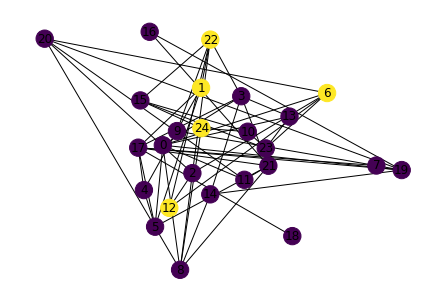

In [16]:
import random

#Inicialize a random graph
G=nx.erdos_renyi_graph(n, 0.15,seed=45)

#Assign type of node
for u in G.nodes():
    rand = random.randint(0, 48)
    G.nodes[u]['Type'] = 1 if rand < 12 else 0

#Draw the graph with specified colors for each node type
color_val = [nx.get_node_attributes(G,'Type').get(node) for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color = color_val)

In this case, we construct a random graph with 25 nodes and a probability of 0.15 of having an edge between nodes. For our example, we consider a setting of a communications company where the graph considers calls between users. Particularly, the company wants to differentiate between new users (less than 12 months) and old users (more than 12 months) to understand if there are different behaviors between users.

As in our example, most real-life graphs are heterogeneous graphs where different entities interact. It is quite complicated to describe a process with only one type of entity interacting with other entities all of the same type, making Heterogenous Graphs more challenging to deal with but also more expressive of the process they describe.

It's also relevant to note that different type of nodes may have different characteristics or features. Think of a paper-author network, where we have author relationships between Author and Paper nodes, and citation relationships where Paper nodes connect with each other if they have cited any other paper. In this type of example, we may have really distinct feature sets between the Authors and the Papers, and as such we have to be more creative when dealing with those networks.

NetworkX also has a number of pre-determined made Graphs, such as this one with the coappearance network of characters in the novel Les Miserables.

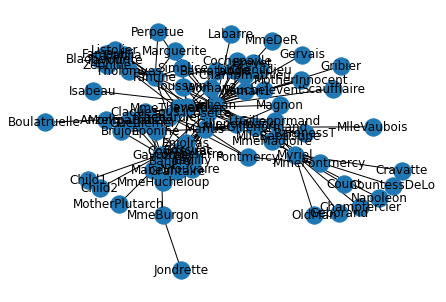

In [27]:
lm_graph = nx.les_miserables_graph()
nx.draw(lm_graph, with_labels=True)

characters = lm_graph.nodes()

Now let's try to get the neighbors of the character Myriel using a built-in function of the NetworkX Graph Class:

In [28]:
# Hint you should transform the output of the built-in function into a list to show the results
# Your code goes here

Exercise:

With any of the Graph Generators (https://networkx.org/documentation/stable/reference/generators.html) Create a graph of preference, and through a built-in method of the NetworkX Graph Class get the neighbors of a certain node:


In [17]:
# Your code Goes here

## Creating Graph Based Features and enhancing ML models 

Now let's see how we can use these new features taken from the graph to enhance our ML models. First, let's import the information of the users in the graph from the nodes_features_workshop csv.

In [14]:
df = pd.read_csv('https://github.com/jdacevedo3010/graph-mahine-learning-workshop/raw/master/data/nodes_features_workshop.csv').set_index('USER_ID')
df.head()

,DEVICE_TYPE,EXPECTED_VALUE,SALES,FRAUD
USER_ID,,,,
0,1.000000,0.50,0.042571,0
1,0.166667,0.00,0.000516,0
2,0.166667,0.00,0.000516,0
3,0.833333,0.25,0.000626,0
4,0.166667,0.50,0.000516,0


Here we have a DataFrame with the users as the index. The columns contain the features that profile them:

1. Device Type: An encoding of the different devices in the dataset
2. Expected Value: A score that measures the value the client will bring
3. Sales: Total amount spent by the user

And a label that tells us whether the user is fraudulent or not (FRAUD column).

Let's use this information to train a couple of traditional Machine Learning models such as: Gradient Boosting Trees, and Logistic Regression. Let's first create train and test masks, we will do this manually given that we wil later need this same division for the Graph Neural Networks. We will also be using torch tensors for the same reason.

In [15]:
import torch as th

def create_masks(df, seed=23, test_size=0.2):
    '''
    This function creates binary tensors that indicate whether an user is on the train or test set
    '''
    np.random.RandomState(seed)
    temp_df = df.copy()
    temp_df['split_flag'] = np.random.random(df.shape[0])
    train_mask = th.BoolTensor(np.where(temp_df['split_flag'] <= (1 - test_size), True, False))
    test_mask = th.BoolTensor(np.where((1 - test_size) < temp_df['split_flag'] , True, False))
    return train_mask, test_mask

In [16]:
#Create binary masks
train_mask, test_mask = create_masks(df, 23, 0.3)

print(train_mask)

#Here we transform the tensors so they indicate the indices of the train and test users instead of the binary
train_nid = train_mask.nonzero().squeeze()
test_nid = test_mask.nonzero().squeeze()

print(train_nid)

tensor([ True,  True,  True,  ..., False,  True,  True])
tensor([     0,      1,      2,  ..., 144071, 144074, 144075])


Now, let's create the X and Y tensors:

In [17]:
#Create X and Y dataframes
X = df.drop(['FRAUD'], axis=1)
y = df.drop(['DEVICE_TYPE','EXPECTED_VALUE','SALES'], axis=1)

print('The shape of the X DataFrame is: ',X.shape)
print('The shape of the y DataFrame is: ',y.shape)

The shape of the X DataFrame is:  (144076, 3)
The shape of the y DataFrame is:  (144076, 1)


In [18]:
#Transform the X and Y dataframes to tensors now as well
X = th.tensor(X.values).float()
y = th.tensor(y.values).type(th.LongTensor).squeeze_()

print(X.shape)
print(y.shape)

torch.Size([144076, 3])
torch.Size([144076])


Let's create the functions to train the ML models, and a function that allows us to measure the performance of those models in terms of ROC Curve AUC, F1-Score, Precision and Recall:

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

def get_gb_preds(X_train, y_train, X_test, seed=23):
    clf = GradientBoostingClassifier(random_state=seed)
    clf.fit(X_train,y_train)
    y_pred_probas = clf.predict_proba(X_test)
    return y_pred_probas

def get_lr_preds(X_train, y_train, X_test, seed=23):
    clf = LogisticRegression(random_state=seed)
    clf.fit(X_train,y_train)
    y_pred_probas = clf.predict_proba(X_test)
    return y_pred_probas

def get_results(y_pred_probas, y_test, threshold=0.5):
    pred_probas_1 = y_pred_probas[:,1]
    preds_1 = np.where(pred_probas_1>threshold,1,0)
    auc = roc_auc_score(y_test, pred_probas_1)
    f1 = f1_score(y_test,preds_1)
    prec = precision_score(y_test,preds_1)
    recall = recall_score(y_test,preds_1)
    return auc, f1, prec, recall

#### Logistic Regression Results

In [20]:
X[train_nid].shape

torch.Size([100796, 3])

In [21]:
model = 'logistic-regression'
y_pred_probas = get_lr_preds(X[train_nid], y[train_nid], X[test_nid], seed=23)

results_df = pd.DataFrame(columns=['Model','AUC','F1 Score','Precision','Recall'])
auc, f1, prec, recall = get_results(y_pred_probas, y[test_nid], 0.5)
dict_results = {'Model':model, 'AUC':auc, 'F1 Score':f1, 'Precision':prec, 'Recall':recall}
results_df = results_df.append(dict_results, ignore_index=True)

results_df

,Model,AUC,F1 Score,Precision,Recall
0,logistic-regression,0.809303,0.005464,0.5,0.002747


#### GBoost results

In [22]:
model = 'GBoost'
y_pred_probas = get_gb_preds(X[train_nid], y[train_nid], X[test_nid], seed=23)

auc, f1, prec, recall = get_results(y_pred_probas, y[test_nid], 0.5)
dict_results = {'Model':model, 'AUC':auc, 'F1 Score':f1, 'Precision':prec, 'Recall':recall}
results_df = results_df.append(dict_results, ignore_index=True)

results_df

,Model,AUC,F1 Score,Precision,Recall
0,logistic-regression,0.809303,0.005464,0.500000,0.002747
1,GBoost,0.921277,0.255159,0.402367,0.186813


## Creating a Graph from own data using NetworkX

We will know see how to create a graph from data instead of randomly. For this we will have to import the csv's in the data folder and process them for NetworkX.

First lets import the relations csv in the data folder:

In [23]:
import pandas as pd

edges_df = pd.read_csv('https://github.com/jdacevedo3010/graph-mahine-learning-workshop/raw/master/data/new_edges_workshop.csv')
edges_df.head()

,~from,~to
0,38709,137559
1,29310,90848
2,66678,142234
3,27305,91683
4,16345,14474


In [24]:
edges_df.shape

(285146, 2)

Here you a 2-colummn DataFrame that contains the undirected edges between distinct users. This is normally referred to as "List of edges" and it's a common way to create graphs. NetworkX also has a method to create a graph from a DataFrame of edges, let's do just that:

In [25]:
G = nx.from_pandas_edgelist(edges_df,'~from','~to')
G.number_of_nodes()

143399

Let's draw a portion of the graph to check it out:

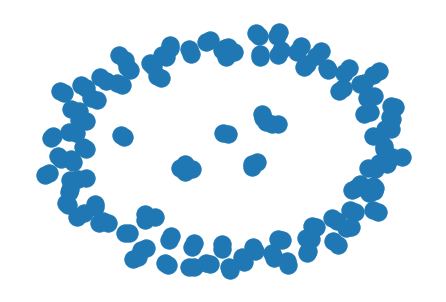

In [26]:
G_draw = nx.from_pandas_edgelist(edges_df.head(100),'~from','~to')
nx.draw(G_draw)

Nice! We can now use this created graph to extract characteristics from it. 

Let's say we want to get the number of neighbors of each node in the graph:

In [27]:
degrees = dict(G.degree)

{38709: 241,
 137559: 3,
 29310: 165,
 90848: 2,
 66678: 121,
 142234: 5,
 27305: 54,
 91683: 8,
 16345: 741,
 14474: 1,
 75307: 717,
 114238: 1,
 38503: 47,
 32024: 2,
 72527: 95,
 36969: 1,
 125388: 45,
 115610: 8,
 11781: 60,
 62848: 1,
 84986: 277,
 129465: 7,
 80301: 129,
 103546: 4,
 142878: 327,
 27373: 9,
 65742: 482,
 8217: 1,
 53535: 50,
 34586: 11,
 3332: 44,
 12801: 166,
 57511: 6,
 3014: 40,
 44229: 15,
 139797: 22,
 131493: 36,
 109550: 86,
 140766: 271,
 86906: 154,
 108474: 2,
 43851: 393,
 116276: 43,
 95491: 107,
 21013: 7,
 73901: 1358,
 36930: 1,
 105936: 12,
 52056: 3,
 110603: 52,
 13570: 4,
 60213: 97,
 82741: 151,
 28419: 6,
 39545: 447,
 46094: 4,
 107548: 68,
 59877: 1,
 17863: 303,
 3186: 2,
 108882: 151,
 103672: 1,
 61269: 1229,
 6281: 1,
 109275: 54,
 47886: 3,
 13336: 43,
 72923: 5,
 32487: 65,
 126: 1,
 106731: 134,
 92961: 51,
 43723: 41,
 24717: 41,
 58987: 2,
 79794: 304,
 45531: 4,
 34937: 221,
 79663: 1,
 23313: 68,
 57644: 4,
 131167: 459,
 48011: 

We can use the degree method in NetworkX to create a dictionary that holds the node id's as the keys and the degree of that node as the value. There are also plenty of other measures, we can extract from the Graph object of NetworkX like centrality or betweeness metrics.

More information about the NetworkX library can be found in this tutorial: https://networkx.org/nx-guides/content/tutorial.html. Or in the overall documentation guide of the package: https://networkx.org/nx-guides/index.html

#### And now let's enhance the features with some extracted from the graphs

Now we will use the previously generated dictionary of degrees as an additional feature to the DataFrame, along with the centrality measure PageRank.

PageRank was developed by Google and measures the importance of a node in a Graph given how connected are the node's neighbors. More information can be found here: https://es.wikipedia.org/wiki/PageRank

Let's first calculate that for the previously generated graph:

In [28]:
pr = nx.pagerank(G,alpha=0.9)


{38709: 0.00028134856493496036,
 137559: 3.6184215745800347e-06,
 29310: 0.00021491406055276703,
 90848: 2.9235228320726046e-06,
 66678: 0.00013181838968575032,
 142234: 6.478822154473766e-06,
 27305: 8.005487320084215e-05,
 91683: 9.994096767518384e-06,
 16345: 0.0011777101965631284,
 14474: 1.9627711608459526e-06,
 75307: 0.0012732191232348062,
 114238: 2.1269079112767955e-06,
 38503: 6.818120607684225e-05,
 32024: 3.0557394555520274e-06,
 72527: 0.0003262916784613502,
 36969: 3.2186017294847754e-06,
 125388: 6.063417832280136e-05,
 115610: 9.671143778462764e-06,
 11781: 8.047889979684001e-05,
 62848: 1.82908963519862e-06,
 84986: 0.0003123823314800208,
 129465: 7.4185519123850235e-06,
 80301: 0.00016089384282071343,
 103546: 4.900122777838145e-06,
 142878: 0.0006123130389800207,
 27373: 1.2292636599334782e-05,
 65742: 0.00076111983631505,
 8217: 2.0113475240084828e-06,
 53535: 7.03095690354761e-05,
 34586: 1.3788914593144994e-05,
 3332: 6.159122392429722e-05,
 12801: 0.0001849078488

Let's take a look at why those values for two nodes are so different. First, we will select a high PageRank node and a low PageRank node. Then, we need to get the 2-hop neighbors of those nodes in a list using the neighbors() method (https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html):

In [29]:
print('The PageRank of the selected highly central node is: ',pr[38709])
print('The PageRank of the selected lowly central node is: ',pr[125388])

The PageRank of the selected highly central node is:  0.00028134856493496036
The PageRank of the selected lowly central node is:  6.063417832280136e-05


In [30]:
def flatten_2d_list(matrix):
    flatten_matrix = []
    for sublist in matrix:
        for val in sublist:
            flatten_matrix.append(val)
    return flatten_matrix

high_neighbors = [n for n in G.neighbors(38709)]
high_neighbors_2 = flatten_2d_list([[n for n in G.neighbors(n2)] for n2 in high_neighbors])
low_neighbors = [n for n in G.neighbors(125388)]
low_neighbors_2 = flatten_2d_list([[n for n in G.neighbors(n2)] for n2 in low_neighbors])


print("Number of 2-hop neighbors of high PageRank: ",len(high_neighbors_2))
print("Number of 2-hop neighbors of low PageRank: ", len(low_neighbors))

Number of 2-hop neighbors of high PageRank:  4391
Number of 2-hop neighbors of low PageRank:  45


As mentioned before, the PageRank measures the centrality of a node given the connections of his neighbors. So in a social network, if my friends have many friends then I'll be a highly central node.

Now let's draw those subgraphs using the subgraph method of networkx (https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) for a better look:

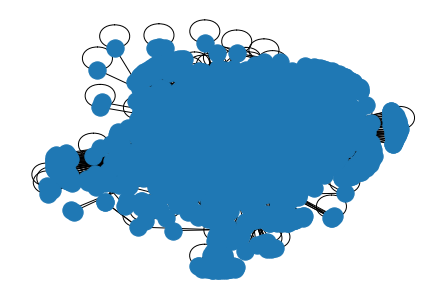

In [31]:
nx.draw(G.subgraph(high_neighbors_2))

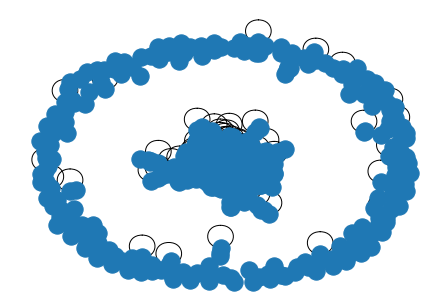

In [32]:
nx.draw(G.subgraph(low_neighbors_2))

We can see that the highly central node has every node highly interconnected with each other, while the low PageRank node has a cluster in the middle and the a satelite circunference around that.

And now let's add both the degree and PageRank as features for the users:

In [33]:
#Map Degree and PageRank into the DataFrame
df_enhanced = df.copy()
df_enhanced['DEGREE'] = df.index.map(degrees)
df_enhanced['PAGERANK'] = df.index.map(pr)

df_enhanced.head()

,DEVICE_TYPE,EXPECTED_VALUE,SALES,FRAUD,DEGREE,PAGERANK
USER_ID,,,,,,
0,1.000000,0.50,0.042571,0,1.0,0.000003
1,0.166667,0.00,0.000516,0,1.0,0.000002
2,0.166667,0.00,0.000516,0,1.0,0.000002
3,0.833333,0.25,0.000626,0,3.0,0.000004
4,0.166667,0.50,0.000516,0,1.0,0.000002


And finally, let's run the same models as before with these new features to see how the results compare with each other:

In [34]:
#Create X and Y dataframes
X_enhanced = df_enhanced.drop(['FRAUD'], axis=1).fillna(0)
y_enhanced = df_enhanced.drop(['DEVICE_TYPE','EXPECTED_VALUE','SALES','DEGREE','PAGERANK'], axis=1)

print('The shape of the X DataFrame is: ',X.shape)
print('The shape of the y DataFrame is: ',y.shape)

The shape of the X DataFrame is:  torch.Size([144076, 3])
The shape of the y DataFrame is:  torch.Size([144076])


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_enhanced[['DEGREE','PAGERANK']] = scaler.fit_transform(X_enhanced[['DEGREE','PAGERANK']])

In [36]:
th.tensor(X_enhanced.values).float().shape

torch.Size([144076, 5])

In [37]:
#Transform the X and Y dataframes to tensors now as well
X_enhanced = th.tensor(X_enhanced.values).float()
y_enhanced = th.tensor(y_enhanced.values).type(th.LongTensor).squeeze_()

print(X_enhanced.shape)
print(y_enhanced.shape)

torch.Size([144076, 5])
torch.Size([144076])


In [38]:
model = 'logistic-regression-enhanced'
y_pred_probas = get_lr_preds(X_enhanced[train_nid], y_enhanced[train_nid], X_enhanced[test_nid], seed=23)

auc, f1, prec, recall = get_results(y_pred_probas, y_enhanced[test_nid], 0.5)
dict_results = {'Model':model, 'AUC':auc, 'F1 Score':f1, 'Precision':prec, 'Recall':recall}
results_df = results_df.append(dict_results, ignore_index=True)

results_df

,Model,AUC,F1 Score,Precision,Recall
0,logistic-regression,0.809303,0.005464,0.500000,0.002747
1,GBoost,0.921277,0.255159,0.402367,0.186813
2,logistic-regression-enhanced,0.808736,0.005464,0.500000,0.002747


In [39]:
model = 'GBoost-enhanced'
y_pred_probas = get_gb_preds(X_enhanced[train_nid], y_enhanced[train_nid], X_enhanced[test_nid], seed=23)

auc, f1, prec, recall = get_results(y_pred_probas, y_enhanced[test_nid], 0.5)
dict_results = {'Model':model, 'AUC':auc, 'F1 Score':f1, 'Precision':prec, 'Recall':recall}
results_df = results_df.append(dict_results, ignore_index=True)

results_df

,Model,AUC,F1 Score,Precision,Recall
0,logistic-regression,0.809303,0.005464,0.500000,0.002747
1,GBoost,0.921277,0.255159,0.402367,0.186813
2,logistic-regression-enhanced,0.808736,0.005464,0.500000,0.002747
3,GBoost-enhanced,0.918932,0.253259,0.393064,0.186813


It looks like in this case the new added features from the graph are not achieving a better performance for the Machine Learning model, this could be due to the model already doind a pretty good job with the non-graph features and because of the social graph not provding usefull information for fraude detection that makes sense given that fraudulents probably would try to hide from connections. Maybe another type of graph can be better to this task.

Given the rarity of these Graph-Based Features they carry vastly different information from the tipically used features and as such allow the model to better differentiate classes, that can lead to better performance in models.This conclusions is further developed on our previously published paper: Supporting Financial Inclusion with Graph Machine Learning and Super-App Alternative Data; where we prove how graph based features augments the AUC of Credit RIsk models up to 4-5 percentage points!

https://arxiv.org/abs/2102.09974


![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/paper_performance.png)

The above Figure is taken from the paper, there, the authors show how Graph-Based Features Enhanced models improve the results in terms of predicting credit default over non-Grap-based features models (Base in the figure). 

## Transductive vs Inductive Learning

As shown in the paper and in the simple example above, the enhancing of traditional ML pipelines with graph-based features can be highly benefitial for the performance of the model. The question then is why don't we stop at this point?. What's the point of developing highly complex algortihms such as Graph Neural Networks?

This serves us as an introduction to the next topic, Transductive & Inductive Learning.

Transductive Learning is when the model learns from the complete graph, and through the hiding of some labels is tests on some masked subset of nodes. This means that when a set of unseen nodes is added the model can't handle those new nodes and has to be retrained.

Inductive Learning is when the model desn't need to have access to al nodes and edges of the graph for training, as such we can train with a section of the graph and test on the other previously unseen section. Thos also means that the model can be trained on a graph or a graph in a period of time, and then use that same model for another similar graph or for new node and edge additions through time.

![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/transductive_inductive.png)

#### Now let's take a few minutes to think whether the previously built model can be used in a Transductive or Inductive setting 

Hint: Use the definitions of the Graph Based Features added to get to this answer:

PageRank: https://es.wikipedia.org/wiki/PageRank
Degree: https://en.wikipedia.org/wiki/Degree_(graph_theory)

Your answer goes here:






#### The Inductive nature of Graph Neural Networks is the reason why they have taken so much popularity. With them we do not need to have expert knowledge crafting of graph based features, and we can also train a model that can then be used in other similar graphs or in evolutions of the graph where it was trained!

## Graph Neural Networks - Introduction to DGL 

Let's start by giving a brief introduction to DGL.

DGL, acronym for Deep Graph Library, is an easy to use library for the creation of deep learning models on graphs (also known as Graph Neural Networks or GNN's). This package is framework agnostic, being able to use PyTorch, TensorFlow or Apache MXNet. It's also efficient and scalable using fast and memory efficient message passing primitive for training GNN's that can be scaled using GPU acceleration.

Here you can find more information on the package or educative examples where it's used: https://www.dgl.ai/

In [40]:
import dgl
import torch as th
import torch.nn as nn
import torch.nn.functional as F

Using backend: pytorch


As said on the presentation, there are many taks that can be performed with GNN's:

1. Node Classification: Where we want to predict whether a node belong to a certain class, think of the previous task where we wanted to determine whether users were fraudulent.
2. Link Prediction: Where we want to predict the likeliness of every pair of nodes being connected. Think of a reccomender system of friend in Facebook, the likelier a connection is the more would the platform reccomend you add that person.
3. Graph Classification: Where we want to perfeor classification on a certain structure of nodes or in a whole graph, this can be used for families detection in a graph.

For the purpose of this workshop and considering time-constraint we will be reviewing Node Classification Tasks. Performing the same classification task done with the previous traditional ML models.


#### Let's first remember a few things from the graph, do you think we are dealing with a heterogeneous or homogeneous graph?

That is quite relevant for the GNN model to be used because it dictates what kind of models we can use. For example Graph Convolutional Network (GCN) can only handle homogeneous graphs, if we have a heterogenous graph we have to use a variant in it's implementation called Relational Graph Convolutional Networks (RGCN). 

#### GCN Review

This model was the first GNN developed, it is considered as one of the most basic GNN variants. This model was developed by Kipf and Welling, published in 2017 with this paper: https://arxiv.org/pdf/1609.02907.pdf.

The convolution concept used here is quite similar to that of the Convolutional Neural Networks (CNN) tipically used in Computer Vision. The key difference here is that a CNN is built for Euclidean structured data, and graphs are definitely not that. 

This can be easily explained with this example, in images, when we separate those on pixels for Computer Vision we know that every pixel has the same amount of pixels surrounding it, they follow an specific order it's a perfect grid structure. In graphs, not every node has the same amount of neighbors and there is no intrinsic order in them, those irregularities give graphs their non-Euclidean structure nature.

![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/convolutions.png)

source: https://arxiv.org/pdf/1901.00596.pdf

Therefore, most GNN's are modifications to take into account the non-Euclidean nature of graphs. Mostly, this is done via permutation invariant aggregations (like the sum or average) of the neighbors for each node, this is commonly known as message passing.

In the case of GCN the formula for the forward of the layers is the following:

![](https://raw.githubusercontent.com/jdacevedo3010/graph-mahine-learning-workshop/master/images/gcn.png)

Here, through the dot product between A & H we are transforming the representation from their features or previous representationto the sum of the neighboring nodes features or representations, to then be passed through a selected non-linearity function represented by sigma (This can be a Relu, Leaky Relu, sigmoid, etc). We need to take into account that this does not aggregate the nodes own features unless there are self-loops for every node, this is a common modification done to graphs for GNN's.

It's also important to notice that with each forward message passing of the GNN we are aggregating another hope aways of neighbors!


#### Now let's code that up!

Let's build a two layer GCN that classfies our nodes on whether they are fraudsters or not! With DGL this is as easy as creating a GCN model class that calls the method GraphConv.

In [41]:
#GCN Class
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        #Here we go from our original number of features to the size of our hidden representations
        self.conv1 = GraphConv(in_feats, h_feats)
        #Here we go from the hidden representation to the dimension of the number of classes for the probabilities
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat) #Here we apply the first convolution
        h = F.relu(h) #Here we apply the selected non-linearity. In this case a Relu
        h = self.conv2(g, h) #Here we apply the second convolution
        return h


Then we can simply create the model with the given attributes, we will be using the feature set without the Graph-Based features here and a hidden state size of 16.

In [42]:
hidden_size = 16
num_classes = 2

# Create the model with given dimensions
model = GCN(X.shape[1], hidden_size, num_classes)

And now we will create the training function using PyTorch:

In [43]:
def train(g, features, labels, train_mask, test_mask, epochs, model):
    optimizer = th.optim.Adam(model.parameters(), lr=0.01) #Selected optimizer
    best_val_acc = 0
    best_test_acc = 0

    #Here we create the validation set with a portion of the train set
    val_mask = train_mask[:len(train_mask) // 5]
    train_mask = train_mask[len(train_mask) // 5:]

    train_mask = train_mask.nonzero().squeeze()
    test_mask = test_mask.nonzero().squeeze()
    val_mask = val_mask.nonzero().squeeze()

    for e in range(epochs):
        # Forward
        logits = model(g, features)

        # Compute prediction
        pred = logits.argmax(1)

        # Compute loss
        # Note that you should only compute the losses of the nodes in the training set.
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        # Compute accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))
    
    #Check results on test set
    y_pred_probas = model(g, features).detach().numpy()
    y_pred_probas = y_pred_probas[test_mask]
    y_preds = y_pred_probas[:,1]
    model_name = 'GCN'
    
    auc, f1, prec, recall = get_results(y_pred_probas, labels[test_nid], 0.5)
    dict_results = {'Model':model_name, 'AUC':auc, 'F1 Score':f1, 'Precision':prec, 'Recall':recall}
    results_df = pd.DataFrame(columns=['Model','AUC','F1 Score','Precision','Recall'])
    results_df = results_df.append(dict_results, ignore_index=True)
    return results_df

After that, we have to create the dgl graph to send into the GNN's. It is not the same as in NetworkX this is not a hard process either as you shall see:

In [44]:
#We start by using the same edges df but transforming the from and to columns into arrays
src = edges_df['~from'].to_numpy()
snk = edges_df['~to'].to_numpy()

G_dgl = dgl.graph((src,snk))

Additionally, DGL graphs objects also have some cool methods in it like a fast description of the whole graph: 

In [45]:
G_dgl

Graph(num_nodes=144076, num_edges=285146,
      ndata_schemes={}
      edata_schemes={})

That way we can quickly check the number of nodes or edges. Additionally, when dealing with heterogeneous graphs we can also see the different type of both nodes and edges. The n_data and e_data schemes are there if we want to directly add attributes to either the nodes or edges of the graph respectively.

More information about what we can do with DGL graph objects can be found here: https://docs.dgl.ai/en/0.6.x/generated/dgl.graph.html

We also have to add self-loops to the Graph so that the DGL model also takes the nodes own information in the aggregation. Let's do that using the simple add_self_loop() method of DGL (https://docs.dgl.ai/en/0.6.x/generated/dgl.add_self_loop.html):

In [46]:
G_dgl.add_edges(G_dgl.nodes(), G_dgl.nodes())

In [47]:
y[train_mask]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [48]:
epochs = 100
results_df = train(G_dgl, X, y, train_mask, test_mask, epochs, model)

In epoch 0, loss: 0.551, val acc: 0.990 (best 0.990), test acc: 0.991 (best 0.991)
In epoch 5, loss: 0.415, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 10, loss: 0.287, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 15, loss: 0.184, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 20, loss: 0.115, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 25, loss: 0.079, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 30, loss: 0.064, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 35, loss: 0.059, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 40, loss: 0.058, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 45, loss: 0.058, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 50, loss: 0.058, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0.992)
In epoch 55, loss: 0.058, val acc: 0.990 (best 0.990), test acc: 0.992 (best 0

/home/jd/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
results_df

,Model,AUC,F1 Score,Precision,Recall
0,GCN,0.547464,0.0,0.0,0.0


As you can see the results are not up to par with the other models, although this model hasn't been optimized at all in terms of hyperparameters. That could up the performance to better levels. Additionally these models are quite usefull because there is no necesarry construction of new features or expert inputs in the crafting of the model. This along with the inductive nature of the model allows us to use it on any similar graph!

We have also proven the effectiveness of GNN's (More specifically RGCN) on more complex datasets and graphs in our paper: https://arxiv.org/abs/2107.13673


#### As said before there are many other GNN models, for this specific graph we can use more complex variants like GAT, GraphSage or GIN. Those achieve better generalization of the task at hand and usually lead to better results. 

Other GNN's that we recommend trying for this same dataset changing the model calss object:

GAT introduces attentions to the GCN model, weighting neighbors with certain features more for the classification task. More information can be found here: https://docs.dgl.ai/en/0.4.x/tutorials/models/1_gnn/9_gat.html

GraphSAGE is a general inductive framework that leverages node feature information (e.g.,  text  attributes) to  efficiently  generate  node  embeddings  forpreviously unseen data. More information can be found here: https://github.com/dmlc/dgl/tree/master/examples/pytorch/graphsage

GIN is the most expressive GNN developed to this date. More information can be found here: https://github.com/dmlc/dgl/tree/master/examples/pytorch/gin

Now you can try to modify the model class object with whichever other model you prefer and compare the results with GCN!

In [50]:
#Your code goes here

We hope you liked this introduction to GNN's this is a highly compeling subject that is currently on of the most researched on the world. Feel free to contact us to any questions you may have about this!